<a href="https://colab.research.google.com/github/SnaraC/Machine-Learning-Research-Project/blob/main/Machine_Learning_Multi_layer_perceptron_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

In [ ]:
# Import the data

#data = pd.read_excel('/content/sample_data/Dataset_A_dataset.xlsx')
#data = pd.read_excel('/content/sample_data/updatedData.xlsx')
#data = pd.read_csv('/content/sample_data/Dataset_B_dataset.csv')

# Remove missing data

data.dropna(axis=0, inplace=True)
#print(column)

(515, 102)


In [ ]:
#Choose the target output

#x = data.drop(['PHQ', 'Y1MED1FF'], axis=1)
#y = data['Y1MED1FF']

#x = data.drop(['PHQ', 'Y1MED1FF'], axis=1)
#y = data['PHQ']

#x = data.drop(['target', 'ID'], axis=1)
#y = data['target']


In [ ]:
# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Oversampling balancing technique

#smote = SMOTE(sampling_strategy='auto')
#X_train_resampled, y_train_resampled = smote.fit_resample(X_scaled, y)

# Random Undersampling balancing technique

#undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
#X_train_resampled, y_train_resampled = undersampler.fit_resample(X_scaled, y)

# Train and Test
X_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)




In [ ]:
# Model selection

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Epoch 1/10
11/11 [==============================] - 2s 37ms/step - loss: 0.6350 - accuracy: 0.6839 - val_loss: 0.6324 - val_accuracy: 0.6867
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6079 - accuracy: 0.6991 - val_loss: 0.6318 - val_accuracy: 0.6867
Epoch 3/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6001 - accuracy: 0.6991 - val_loss: 0.6297 - val_accuracy: 0.6867
Epoch 4/10
11/11 [==============================] - 0s 7ms/step - loss: 0.6036 - accuracy: 0.6991 - val_loss: 0.6331 - val_accuracy: 0.6867
Epoch 5/10
11/11 [==============================] - 0s 8ms/step - loss: 0.5910 - accuracy: 0.6991 - val_loss: 0.6290 - val_accuracy: 0.6867
Epoch 6/10
11/11 [==============================] - 0s 7ms/step - loss: 0.5868 - accuracy: 0.6991 - val_loss: 0.6300 - val_accuracy: 0.6867
Epoch 7/10
11/11 [==============================] - 0s 7ms/step - loss: 0.5817 - accuracy: 0.6991 - val_loss: 0.6304 - val_accuracy: 0.6867
Epoch 8/10
11/11 [=

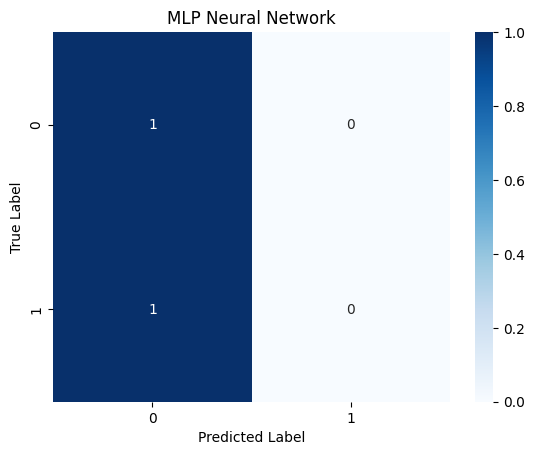

In [ ]:
# Apply the model Deep learning multi-layer perceptron neural network

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_prob  = model.predict(x_test)

threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

cm = confusion_matrix(y_test, y_pred)
# Apply seaborn to access confusion matrix

percentage_cm = np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], 2)

sns.heatmap(percentage_cm, annot=True, cmap='Blues', xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MLP Neural Network')
plt.show()